In [1]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle
import pandas as pd

In [2]:
# Loading the Iris dataset
iris = datasets.load_iris()

In [3]:
# creating database
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

In [4]:
# Renaming species for better clarity
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_map)

In [5]:
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


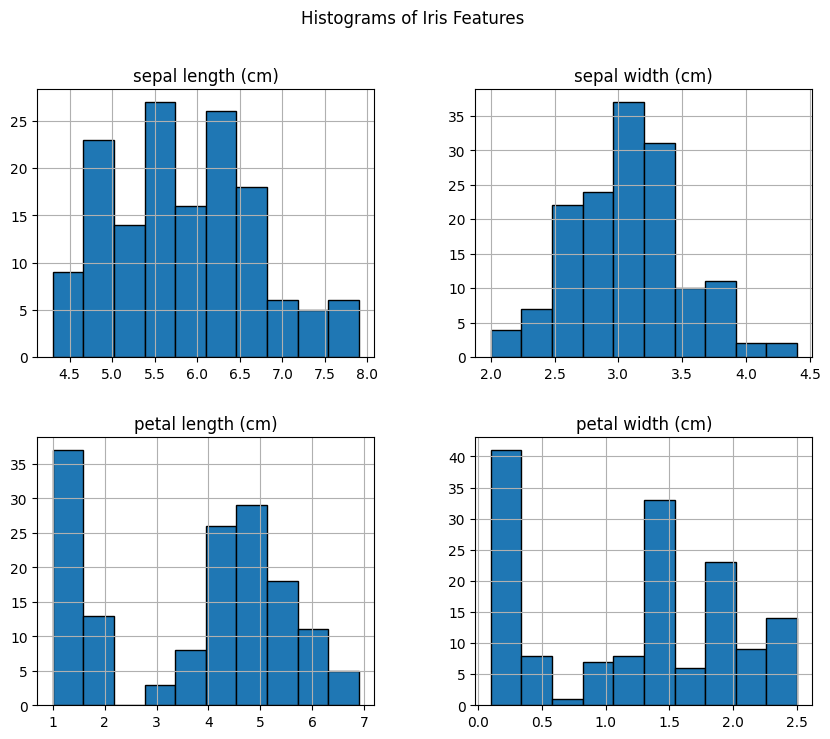

In [6]:
#distribution of feature
iris_df.hist(figsize=(10, 8), edgecolor='black')
plt.suptitle('Histograms of Iris Features')
plt.show()

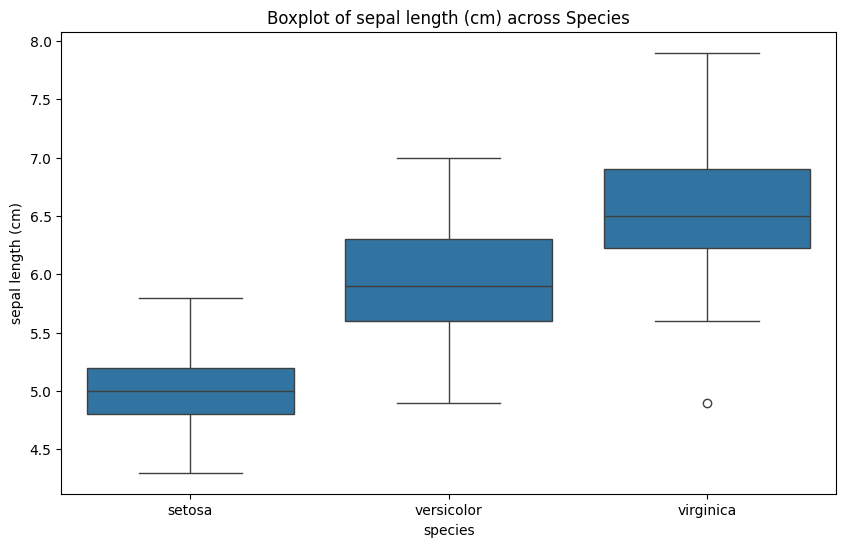

In [7]:
# Boxplot to compare features across species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y=iris_df.iloc[:, 0], data=iris_df)
plt.title(f'Boxplot of {iris.feature_names[0]} across Species')
plt.show()


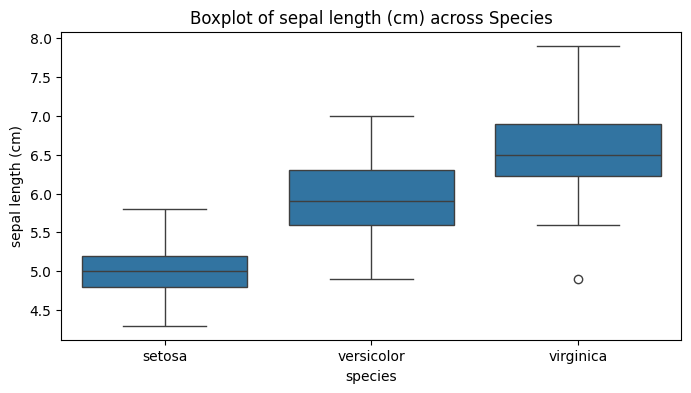

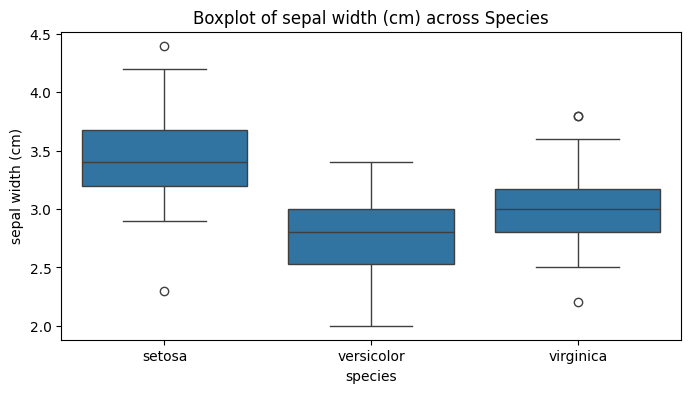

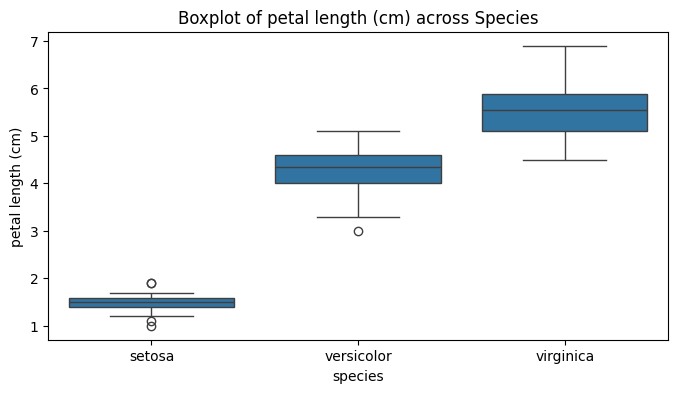

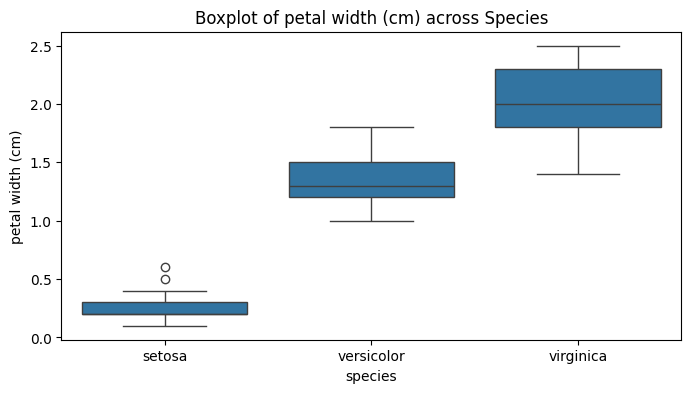

In [8]:
# Boxplots for all features across species
for i, col in enumerate(iris_df.columns[:-1]):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='species', y=col, data=iris_df)
    plt.title(f'Boxplot of {col} across Species')
    plt.show()

In [9]:
# Features (X) and labels (y)
X = iris.data  # features: Sepal length, Sepal width, Petal length, Petal width
y = iris.target  # target: species

In [10]:
# Splitting the dataset 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# using Linear Regression
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(x_train, y_train)
lin_reg_score = lin_reg.score(x_test, y_test)
print(f"Linear Regression R^2 Score: {lin_reg_score}")


Linear Regression R^2 Score: 0.9468960016420045


In [13]:
#using Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg = log_reg.fit(x_train, y_train)
log_reg_score = log_reg.score(x_test, y_test)
print(f"Logistic Regression Accuracy: {log_reg_score}")

Logistic Regression Accuracy: 1.0


In [14]:
# using Support Vector Classifier (SVC)
svc_model = SVC()
svc_model = svc_model.fit(x_train, y_train)
svc_score = svc_model.score(x_test, y_test)
print(f"SVC Accuracy: {svc_score}")

SVC Accuracy: 1.0


In [15]:
# Save the models using pickle
pickle.dump(lin_reg, open('lin_model.pkl', 'wb'))
pickle.dump(log_reg, open('log_model.pkl', 'wb'))
pickle.dump(svc_model, open('svc_model.pkl', 'wb'))

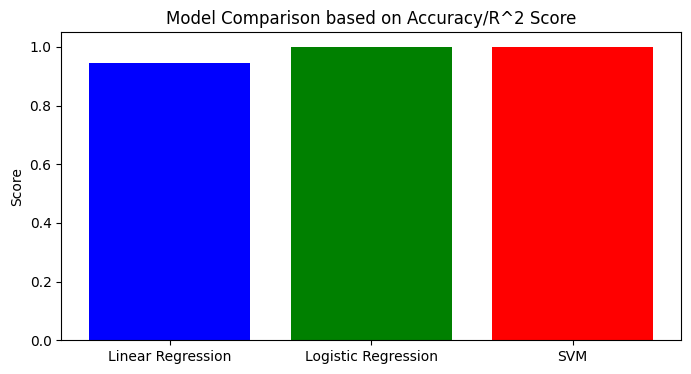

In [16]:
# Plotting the results
scores = {'Linear Regression': lin_reg_score, 'Logistic Regression': log_reg_score, 'SVM': svc_score}
plt.figure(figsize=(8, 4))
plt.bar(scores.keys(), scores.values(), color=['blue', 'green', 'red'])
plt.title('Model Comparison based on Accuracy/R^2 Score')
plt.ylabel('Score')
plt.show()